# Гаркавый Андрей, 494 группа

Задание - пройти контест на Kaggle.

In [22]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
sample_submission = pd.read_csv("sample_submission.tsv")

In [3]:
train.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0,123438,2012,52,1,20442076,4915.0,38056.0,40185.0,45733.0,...,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0
1,1,58410,2012,52,1,20441997,2230.0,18817.0,20110.0,26368.0,...,22830.0,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0
2,2,163930,2012,52,1,20441990,5695.0,47480.0,47619.0,89708.0,...,14930.0,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0
3,3,53902,2012,52,1,20441989,1995.0,17146.0,20066.0,27070.0,...,15120.0,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0
4,4,105970,2012,52,1,20441988,6515.0,49262.0,50045.0,95167.0,...,18872.0,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0


In [4]:
test.head()

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,348622,2015,3,3,20447918,960.0,820.0,1128.0,1801.0,1045.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
2,348624,2015,3,3,20447732,115087.0,147287.0,176065.0,143105.0,202069.0,...,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0
3,348625,2015,3,3,20443951,20900.0,24420.0,27068.0,20460.0,25580.0,...,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0
4,348626,2015,3,3,20443944,4430.0,5864.0,3310.0,1853.0,2836.0,...,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0


In [5]:
sample_submission.head()

,Num,y
0,348622,198575.912031
1,348623,198575.912031
2,348624,198575.912031
3,348625,198575.912031
4,348626,198575.912031


In [148]:
frac = 0.05

train_part = train.sample(frac=frac, random_state=42)
train_part = train_part.sort_values(['year', 'week'], ascending=[1, 1])

X = train_part.drop(['Num', 'y'], axis=1)
y = train_part['y']

Будем работать с 5% выборки.

In [149]:
X.head()

,year,week,shift,item_id,f1,f2,f3,f4,f5,f6,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
127,2012,52,1,20438572,20650.0,198032.0,215778.0,260442.0,351795.0,212581.0,...,196921.0,183287.0,239261.0,149807.0,180159.0,184969.0,247905.0,155447.0,206402.0,199538.0
176,2012,52,1,20438332,8020.0,71982.0,78962.0,112012.0,150403.0,80233.0,...,72251.0,75669.0,112764.0,48416.0,71649.0,87808.0,126992.0,62207.0,63960.0,76286.0
128,2012,52,1,20438581,0.0,0.0,0.0,10.0,0.0,10.0,...,10.0,10.0,0.0,10.0,10.0,10.0,40.0,100.0,10.0,50.0
35,2012,52,1,20440742,0.0,0.0,20.0,30.0,20.0,15.0,...,0.0,0.0,10.0,0.0,0.0,0.0,10.0,40.0,30.0,40.0
212,2012,52,1,20438687,3870.0,38538.0,42185.0,43778.0,57285.0,32580.0,...,34150.0,37630.0,49825.0,27780.0,33270.0,39875.0,42385.0,30173.0,31430.0,41870.0


In [150]:
y.head()

127    485643
176    222073
128       177
35         32
212     98145
Name: y, dtype: int64

In [14]:
def smape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / (abs(y_true) + abs(y_pred)))) * 200

In [15]:
def score_model(model, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    cross_val_score = []
    for train_index, test_index in tscv.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        cross_val_score.append(smape(y_test, preds))
    cross_val_score = np.array(cross_val_score)
    score = cross_val_score.mean()
    return score

Написали функцию для вычисления кросс-валидации по времени на наших данных.

In [151]:
print(score_model(GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=43), X, y))
print(score_model(GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=44), X, y))

42.0652490825
35.550399101


In [152]:
f = X.shape[1]
print(score_model(DecisionTreeRegressor(max_features=int(f ** 0.5)), X, y))

42.2848688338


In [153]:
print(score_model(BaggingRegressor(DecisionTreeRegressor()), X, y))

32.2154991918


In [154]:
print(score_model(BaggingRegressor(DecisionTreeRegressor(max_features=int(f ** 0.5))), X, y))

33.8987945987


In [155]:
print(score_model(RandomForestRegressor(), X, y))

32.722747705


In [156]:
print(score_model(BaggingRegressor(RandomForestRegressor()), X, y))

33.0592496799


Проверили несколько регрессоров: самые лучшие - это BaggingRegressor(DecisionTreeRegressor() и RandomForestRegressor().
Если отправить RandomForestRegressor, обученный на всей выборке, получаем SMAPE 24 с чем-то, это неплохо, это лучший мой результат.

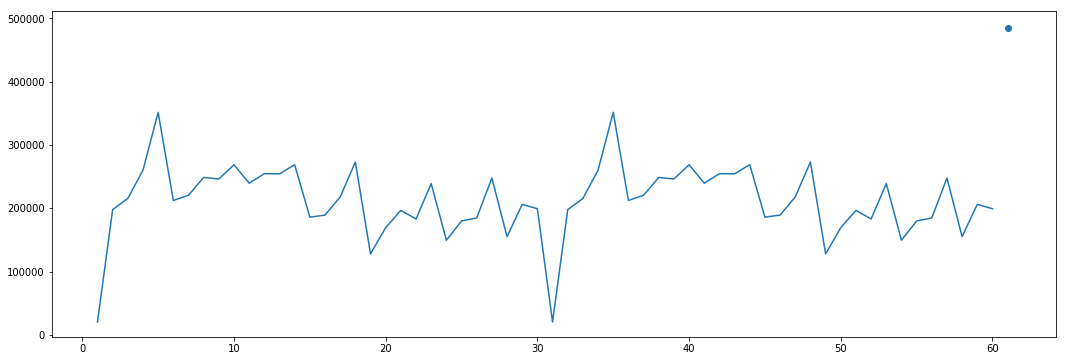

In [157]:
plt.figure(figsize=(18, 6))
plt.plot(np.arange(1, 61), [X['f' + str(i)].iloc[0] for i in np.arange(1, 61)])
plt.scatter([61], [y.iloc[0]])
plt.show()

Если нарисовать данные, видно, что первая половина f1...f30 повторяет вторую f31..f60.
Выкинем половину.

In [158]:
X = X[['f' + str(i) for i in np.arange(1, 31)] + ['year', 'week', 'shift', 'item_id']]
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f25,f26,f27,f28,f29,f30,year,week,shift,item_id
127,20650.0,198032.0,215778.0,260442.0,351795.0,212581.0,220787.0,249000.0,246481.0,268937.0,...,180159.0,184969.0,247905.0,155447.0,206402.0,199538.0,2012,52,1,20438572
176,8020.0,71982.0,78962.0,112012.0,150403.0,80233.0,101056.0,102723.0,108437.0,138153.0,...,71649.0,87808.0,126992.0,62207.0,63960.0,76286.0,2012,52,1,20438332
128,0.0,0.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,10.0,...,10.0,10.0,40.0,100.0,10.0,50.0,2012,52,1,20438581
35,0.0,0.0,20.0,30.0,20.0,15.0,0.0,5.0,0.0,5.0,...,0.0,0.0,10.0,40.0,30.0,40.0,2012,52,1,20440742
212,3870.0,38538.0,42185.0,43778.0,57285.0,32580.0,35460.0,38701.0,39796.0,50395.0,...,33270.0,39875.0,42385.0,30173.0,31430.0,41870.0,2012,52,1,20438687


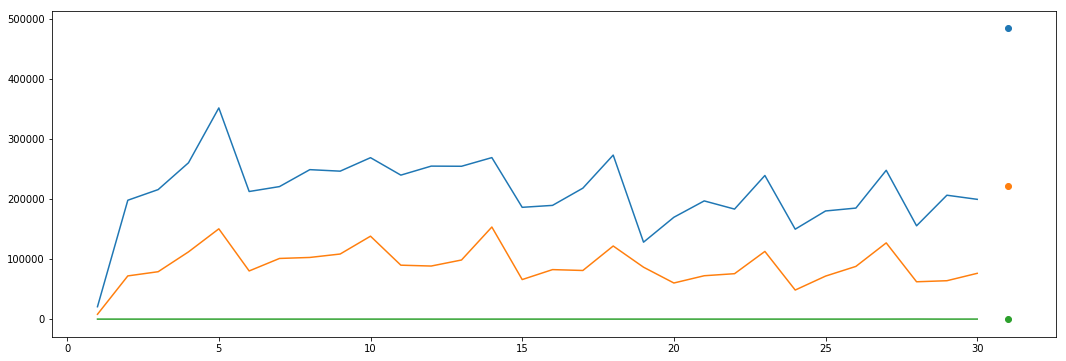

In [160]:
plt.figure(figsize=(18, 6))
plt.plot(np.arange(1, 31), [X['f' + str(i)].iloc[np.arange(0, 3)] for i in np.arange(1, 31)])
plt.scatter([31], [y.iloc[0]])
plt.scatter([31], [y.iloc[1]])
plt.scatter([31], [y.iloc[2]])
plt.show()

Можно заметить, что значение y 0 - очень похоже на последнюю f. В условии сказано, что это продажи в какие-то периоды времени этого товара, похоже, то чем больше f - тем ближе к нужной неделе.

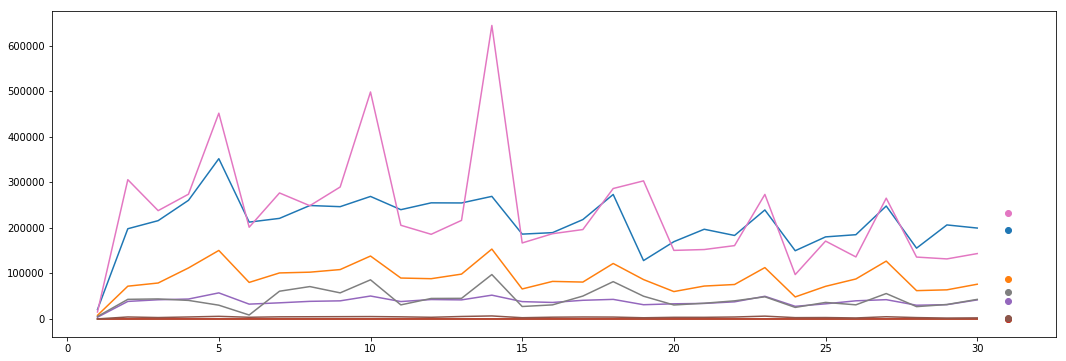

In [161]:
C = 0.4
n = 8
plt.figure(figsize=(18, 6))
plt.plot(np.arange(1, 31), [X['f' + str(i)].iloc[np.arange(0, n)] for i in np.arange(1, 31)])
for i in np.arange(0, n):
    plt.scatter([31], [y.iloc[i] * C])
plt.show()

Если домножить на коэффициент, действительно, видим, что y - около f30. Поэтому разумно обучать только на последних элементах выборки.

In [171]:
ns = [1, 5, 10, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
rf_scores = []
for n in ns:
    rf_scores.append(score_model(RandomForestRegressor(), 
                                 X[['f' + str(i) for i in np.arange(n, 31)] +
                                   ['year', 'week', 'shift', 'item_id']], y))

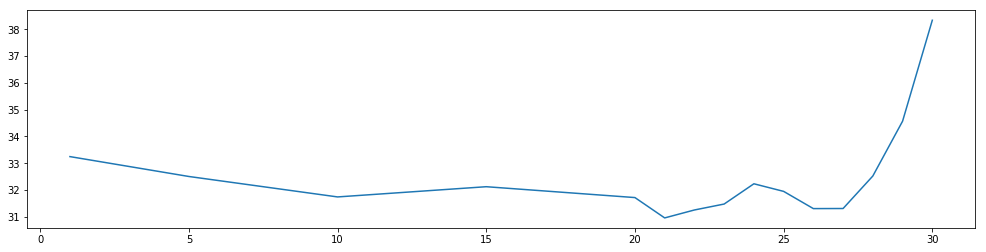

In [172]:
plt.figure(figsize=(17, 4))
plt.plot(ns, np.array(rf_scores))
plt.show()

Давайте выкинем данные до f_n, переберем n.
Надо взять n около 21.

In [173]:
rf_scores

[33.248894358863701,
 32.507210083460173,
 31.744576839527888,
 32.125825317476327,
 31.720579341110316,
 30.961565384271204,
 31.257566824930354,
 31.479390408555112,
 32.235177769808118,
 31.951708084870511,
 31.309131958598101,
 31.312646505153833,
 32.525127361363545,
 34.569716621202339,
 38.336367556095986]

In [174]:
dt_scores = []
for n in ns:
    dt_scores.append(score_model(BaggingRegressor(DecisionTreeRegressor()), 
                                 X[['f' + str(i) for i in np.arange(n, 31)] + 
                                   ['year', 'week', 'shift', 'item_id']], y))

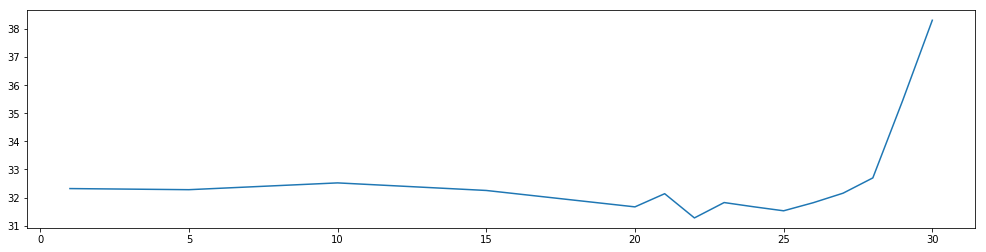

In [175]:
plt.figure(figsize=(17, 4))
plt.plot(ns, np.array(dt_scores))
plt.show()

И для DecisionTreeRegressor, и для RandomForestRegressor мы видим, что n надо выбирать около 21. Возьмем 21.

In [176]:
dt_scores

[32.319635959538495,
 32.279930481395198,
 32.5218424387064,
 32.252378198309103,
 31.667921950084871,
 32.137087067077346,
 31.274733159897561,
 31.821903939554851,
 31.670511703313132,
 31.528124404771212,
 31.817580543870349,
 32.155845043074471,
 32.699666906892595,
 35.445972662429888,
 38.313875979420558]

In [190]:
X_train = train[['f' + str(i) for i in range(21, 31)] + ['year', 'week', 'shift', 'item_id']]
X_train.head()

,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,year,week,shift,item_id
0,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0,2012,52,1,20442076
1,22830.0,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0,2012,52,1,20441997
2,14930.0,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0,2012,52,1,20441990
3,15120.0,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0,2012,52,1,20441989
4,18872.0,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0,2012,52,1,20441988


In [191]:
X_test = test[['f' + str(i) for i in range(21, 31)] + ['year', 'week', 'shift', 'item_id']]
X_test.head()

,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,year,week,shift,item_id
0,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,2015,3,3,20447918
1,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,2015,3,3,20447902
2,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0,2015,3,3,20447732
3,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0,2015,3,3,20443951
4,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0,2015,3,3,20443944


In [192]:
model = RandomForestRegressor()
model.fit(X_train, train['y'])
preds = model.predict(X_test)

In [193]:
sample_submission['y'] = preds
sample_submission.head(5)

,Num,y
0,348622,2794.1
1,348623,27311.6
2,348624,314837.5
3,348625,32043.4
4,348626,17.6


In [194]:
sample_submission['y'] = sample_submission['y'].map(lambda x: x if x > 0 else 0.0)

In [195]:
sample_submission.to_csv("garkavyy_clever_random_forest_submission.tsv", sep=',', index=False)

Итоговый SMAPE мы получили 26, что еще хуже, очень грустно, но что поделать.